# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were the two most tested drug regimens in a count of ten regimines.  These two drugs also had the smallest tumor volumes compared to other regimines including Infubino and Ceftamin.  The was a positive correlation between mouse weight and average tumor volume.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [ ]:
# Checking the number of mice
number_of_mice = len(merged_data_df["Mouse ID"].unique())

number_of_mice

249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = merged_data_df.loc[merged_data_df.duplicated(subset= ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mouse_id

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_id = merged_data_df[merged_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_merged_data_df = merged_data_df[merged_data_df['Mouse ID'] != 'g989']

new_merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [ ]:
# Checking the number of mice
new_number_of_mice = len(new_merged_data_df["Mouse ID"].unique())

new_number_of_mice


248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.




drug_mean = new_merged_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

drug_median = new_merged_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

drug_variance = new_merged_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

drug_std = new_merged_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

drug_sem = new_merged_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


statistics_df = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                              "Median Tumor Volume": drug_median,
                              "Tumor Volume Variance": drug_variance,
                              "Tumor Volume Std. Dev.": drug_std,
                              "Tumor Volume Std. Err.": drug_sem})
statistics_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Using the aggregation method, produce the same summary statistics in a single line.

new_merged_data_df.groupby('Drug Regimen').aggregate({"Tumor Volume (mm3)" : [np.mean, np.median, np.var, np.std, st.sem]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

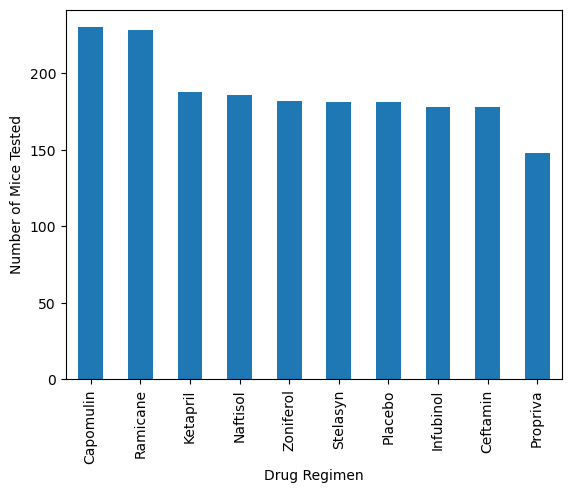

<Figure size 640x480 with 0 Axes>

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen = new_merged_data_df["Drug Regimen"].value_counts()

drug_regiment_chart = drug_regimen.plot(kind="bar")
drug_regiment_chart.set_xlabel("Drug Regimen")
drug_regiment_chart.set_ylabel("Number of Mice Tested")


plt.show()
plt.tight_layout()


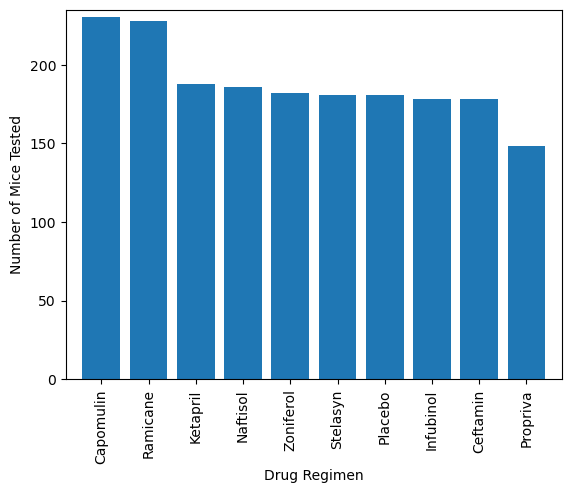

<Figure size 640x480 with 0 Axes>

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#set y axis
number_of_mice = new_merged_data_df["Drug Regimen"].value_counts()

#set x axis
drug_type = np.arange(len(number_of_mice))

#make graph
plt.bar(drug_type, number_of_mice)
plt.xticks(drug_type, rotation ='vertical')

tick_locations = [value for value in drug_type]
plt.xticks(tick_locations, number_of_mice.index.values)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.75, len(drug_type)-0.25)
plt.ylim(0, max(number_of_mice)+5)

plt.show()
plt.tight_layout()

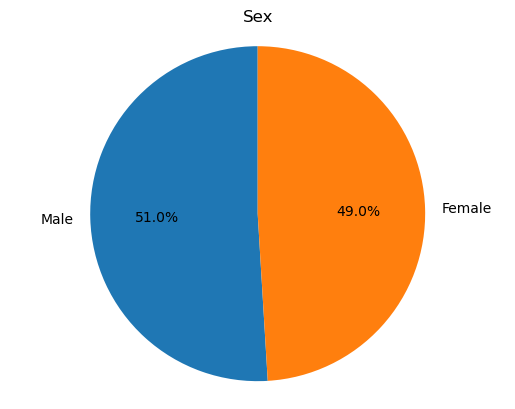

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_vs_female = new_merged_data_df["Sex"].value_counts()


plt.pie(male_vs_female, labels = male_vs_female.index.values, autopct="%1.1f%%", startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Sex")

plt.show()


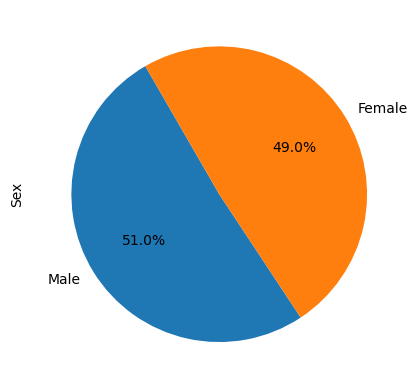

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_vs_female = new_merged_data_df["Sex"].value_counts()

pie_plot = male_vs_female.plot.pie(autopct="%1.1f%%", startangle=120)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoints_df = new_merged_data_df.groupby("Mouse ID").max()["Timepoint"]


max_timepoints_df
                         

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [ ]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_volume_df = pd.merge(new_merged_data_df, max_timepoints_df, on=['Mouse ID', 'Timepoint'], how='right')

last_volume_df
    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

treatment_values = []


# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    
    final_tumor_vol = last_volume_df.loc[last_volume_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']

    treatment_values.append(final_tumor_vol)
        
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   

    outlier_occupancy = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    
    print(f"{treatment}'s potential outliers: {outlier_occupancy}\n")

    
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



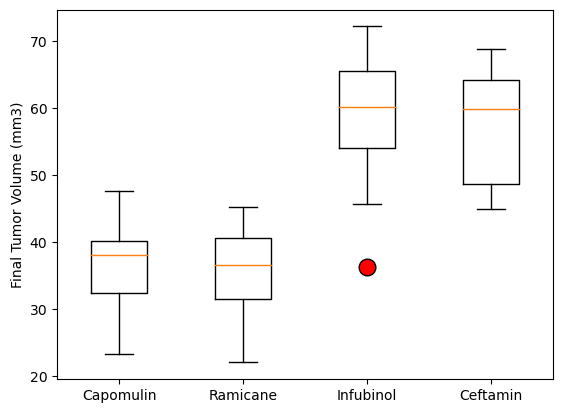

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(treatment_values, labels = treatments, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

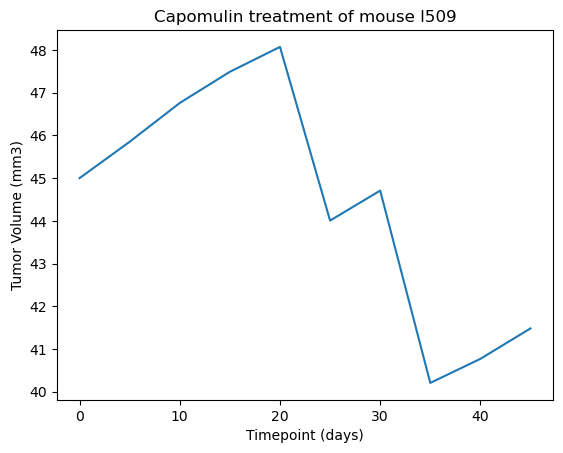

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_table = new_merged_data_df.loc[new_merged_data_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID'] == 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()



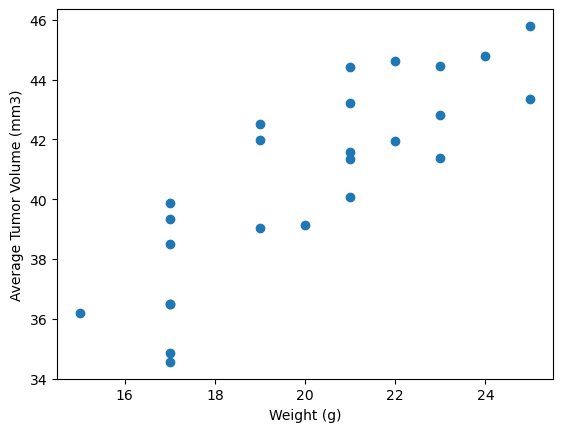

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_table = new_merged_data_df.loc[new_merged_data_df['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


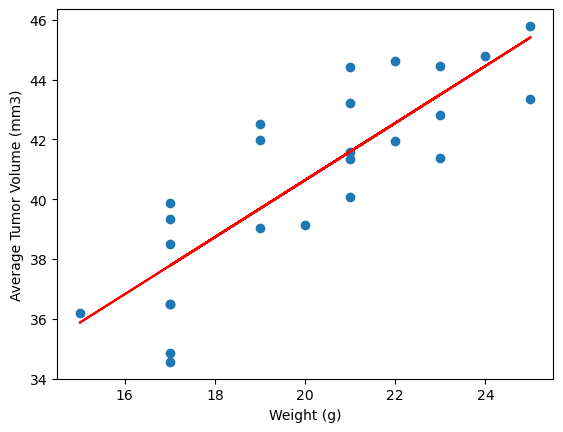

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
